In [20]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [26]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()

In [27]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]

In [30]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns = ['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [31]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

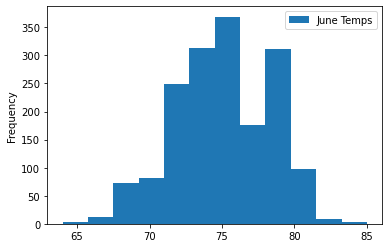

In [46]:
# create histogram of temperture of the month June
june_temps_df.plot.hist(bins=12)

## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

In [34]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]

In [36]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns = ['Dec Temps'])
dec_temps_df

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


<AxesSubplot:ylabel='Frequency'>

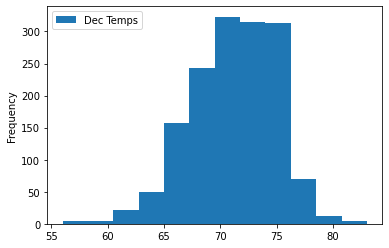

In [45]:
# create the histogram of temperatures of the month December
dec_temps_df.plot.hist(bins=12)

In [37]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [40]:
# precipitation of the month June
june_prcp = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()

# convert the precipitation results to a list
june_prcp_list = [prcp.prcp for prcp in june_prcp]

# convert the list to a DataFrame
june_prcp_df = pd.DataFrame(june_prcp_list, columns = ['June Percipitation'])
june_prcp_df

,June Percipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00
...,...
1695,0.02
1696,0.10
1697,0.02
1698,0.04


<AxesSubplot:ylabel='Frequency'>

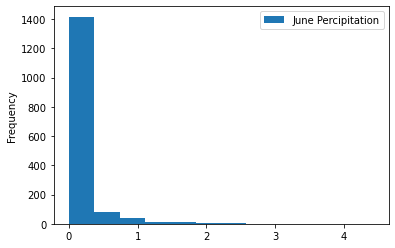

In [50]:
# create the histogram of percipitation of the month June
june_prcp_df.plot.hist(bins=12)

In [41]:
# get the summary statistics of percipitation of June
june_prcp_df.describe()

,June Percipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [47]:
# precipitation of the month December
dec_prcp = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

# convert the precipitation results to a list
dec_prcp_list = [prcp.prcp for prcp in dec_prcp]

# convert the list to a DataFrame
dec_prcp_df = pd.DataFrame(dec_prcp_list, columns = ['Dec Percipitation'])
dec_prcp_df

,Dec Percipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


<AxesSubplot:ylabel='Frequency'>

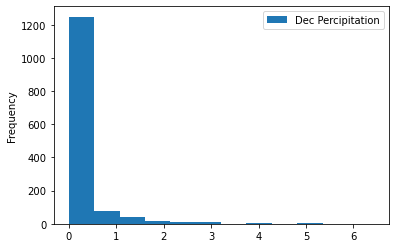

In [51]:
# create the histogram of percipitation of the month December
dec_prcp_df.plot.hist(bins=12)

In [49]:
# get the summary statistics of percipitation of December
dec_prcp_df.describe()

,Dec Percipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
